In [1]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
ps = pd.read_csv('patch_seq_log_mouse.csv')

In [3]:
ps = ps[["Date", "File", "Post patch?", "Time spent extracting cytosol", "patch duration", ">400", "SM_QC_PF", "Bad dates"]]
ps["Time spent extracting cytosol"] = pd.to_numeric(ps["Time spent extracting cytosol"].str.replace(' ',''), errors ='coerce')
ps.dropna(subset = ["Post patch?", "Time spent extracting cytosol", "patch duration", "SM_QC_PF"], inplace = True)
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["patch duration"] = pd.to_numeric(ps["patch duration"].str.replace(' ',''), errors ='force')
ps[">400"] = pd.to_numeric(ps[">400"].str.replace(' ',''), errors ='force')
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["Bad dates"] != "x"]
ps = ps.drop("Bad dates", 1)
ps = ps[ps[">400"] < 10000]
ps.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF
29,2016-04-07,Ndnf - kjh_160407_03,Nucleated patch,5.0,8.0,96.00,pass
30,2016-04-07,Ndnf - kjh_160407_04,Partial-Nucleus,5.0,7.0,111.00,pass
31,2016-04-07,Ndnf - kjh_160407_05,Entire-Cell?,5.0,7.0,27.30,fail
32,2016-04-07,Ndnf - kjh_160407_06,Outside-Out,5.0,7.0,18.76,fail
33,2016-04-07,Ndnf - kjh_160407_07,Outside-Out,2.0,4.0,100.00,pass


In [4]:
ps["Post patch?"].value_counts()

Outside-Out                       793
Nucleated                         654
No-Seal                           590
Partial-Nucleus                   316
Entire-Cell                        25
no-seal                             4
Entire-Cell?                        2
outside-out                         1
nucleus                             1
nucelated                           1
no -seal                            1
n                                   1
leaky Outside-Out                   1
Nucleated patch                     1
Nucleated (maybe Entire-Cell?)      1
dtype: int64

# 4/20/2017 was first day of 21 PCR cycles.  Should be using PCR cycles column to do this filtering 

In [5]:
ps = ps[ps["Date"] >= "2017-04-20"]
#ps.head()
ps["Post patch?"].value_counts()

Nucleated                         454
No-Seal                           352
Partial-Nucleus                   132
Outside-Out                        72
Entire-Cell                         9
outside-out                         0
nucleus                             0
nucelated                           0
no-seal                             0
no -seal                            0
n                                   0
leaky Outside-Out                   0
Nucleated patch                     0
Nucleated (maybe Entire-Cell?)      0
Entire-Cell?                        0
dtype: int64

In [6]:
#ps["Time spent extracting cytosol"].sort_values()

In [7]:
#ps["Time spent extracting cytosol"].value_counts()

# Plot of >400bp concentration vs extraction time by post patch outcomes

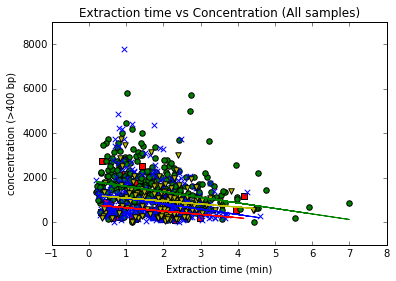

In [6]:
mask1 = ps["Post patch?"] == "Outside-Out"
mask2 = ps["Post patch?"] == "Nucleated"
mask3 = ps["Post patch?"] == "No-Seal"
mask4 = ps["Post patch?"] == "Partial-Nucleus"
mask5 = ps["Post patch?"] == "Entire-Cell"
oo = ps[mask1]
nu = ps[mask2]
ns = ps[mask3]
pn = ps[mask4]
ec = ps[mask5]

x1 = oo["Time spent extracting cytosol"]
y1 = oo[">400"]
x2 = nu["Time spent extracting cytosol"]
y2 = nu[">400"]
x3 = ns["Time spent extracting cytosol"]
y3 = ns[">400"]
x4 = pn["Time spent extracting cytosol"]
y4 = pn[">400"]

def make_plots(x,y,c,m):
    plt.scatter(x,y,s=30,c=c,marker=m)

make_plots(x1,y1,"r","s")
make_plots(x2,y2,"g","o")
make_plots(x3,y3,"b","x")
make_plots(x4,y4,"y","v")

plt.title('Extraction time vs Concentration (All samples)')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

def fit_plots(x,y,c):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    plt.plot(x,p(x),c)
    
fit_plots(x1,y1,"r")
fit_plots(x2,y2,"g")
fit_plots(x3,y3,"b")
fit_plots(x4,y4,"y")

# Filtering down to SMQC passing samples only

In [7]:
ps_pass = ps[ps["SM_QC_PF"] == "pass"]
ps_pass.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF
4737,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01.01,Nucleated,2.366667,3.766667,894.0,pass
4738,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01.02,No-Seal,2.700000,6.766667,376.0,pass
4739,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01.03,No-Seal,1.983333,10.250000,338.0,pass
4740,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01.04,No-Seal,1.933333,3.816667,518.0,pass
4741,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01.05,No-Seal,1.750000,6.083333,439.0,pass


# Plot of >400bp concentration vs extraction time by post patch outcomes - SMQC passing samples only

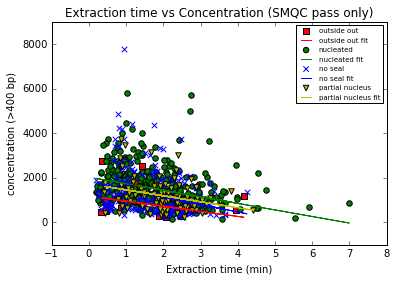

In [8]:
oo = ps_pass[ps_pass["Post patch?"] == "Outside-Out"]
nu = ps_pass[ps_pass["Post patch?"] == "Nucleated"]
ns = ps_pass[ps_pass["Post patch?"] == "No-Seal"]
pn = ps_pass[ps_pass["Post patch?"] == "Partial-Nucleus"]
ec = ps_pass[ps_pass["Post patch?"] == "Entire-Cell"]

x1 = oo["Time spent extracting cytosol"]
y1 = oo[">400"]
x2 = nu["Time spent extracting cytosol"]
y2 = nu[">400"]
x3 = ns["Time spent extracting cytosol"]
y3 = ns[">400"]
x4 = pn["Time spent extracting cytosol"]
y4 = pn[">400"]

fig,ax = plt.subplots(1)

plt.title('Extraction time vs Concentration (SMQC pass only)')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

def make_plots(x,y,c,m,l,n):
    plt.scatter(x,y,s=30,c=c,marker=m,label=l)
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    plt.plot(x,p(x),c=c,label=n)

make_plots(x1,y1,"r","s","outside out","outside out fit")
make_plots(x2,y2,"g","o","nucleated","nucleated fit")
make_plots(x3,y3,"b","x","no seal","no seal fit")
make_plots(x4,y4,"y","v","partial nucleus","partial nucleus fit")    

handles,labels = ax.get_legend_handles_labels()

handles = [handles[4],handles[0],handles[5],handles[1],handles[6],handles[2],handles[7],handles[3]]
labels = [labels[4],labels[0],labels[5],labels[1],labels[6],labels[2],labels[7],labels[3]]

ax.legend(handles,labels,scatterpoints=1,loc='upper right',ncol=1,fontsize=7)

plt.savefig('extraction_vs_conc.png',dpi=300)

# Putting extraction times into 1 minute time bins 

In [9]:
ps["cytosol extraction time bins"] = ps["Time spent extracting cytosol"].astype(int)
ps.info()
#ps["cytosol extraction time bins"].sort_values()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 4737 to 6351
Data columns (total 8 columns):
Date                             1019 non-null datetime64[ns]
File                             1019 non-null object
Post patch?                      1019 non-null category
Time spent extracting cytosol    1019 non-null float64
patch duration                   1018 non-null float64
>400                             1019 non-null float64
SM_QC_PF                         1019 non-null category
cytosol extraction time bins     1019 non-null int32
dtypes: category(2), datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 53.9+ KB


# Functions for getting pass percentages by time bins 

In [10]:
def timebin(x):
    time_bin = ps[ps["cytosol extraction time bins"] == x]
    return time_bin

def timebin_total(x):
    bin_total = x["cytosol extraction time bins"].count()
    return bin_total

def timebin_pass(x):
    timebin_pass = x[x["SM_QC_PF"] == "pass"]
    pass_total = timebin_pass["SM_QC_PF"].count()
    return pass_total

def timebin_pp(x):
    timebin_pp = float(timebin_pass(x)) / float(timebin_total(x))
    return timebin_pp

# 0-1 Minute Extraction 

In [11]:
print "Total count =", timebin_total(timebin(0))
print "Pass count =", timebin_pass(timebin(0))
print "Pass percentage =", timebin_pp(timebin(0))

Total count = 214
Pass count = 164
Pass percentage = 0.766355140187


# 1-2 Minute Extraction 

In [12]:
print "Total count =", timebin_total(timebin(1))
print "Pass count =", timebin_pass(timebin(1))
print "Pass percentage =", timebin_pp(timebin(1))

Total count = 358
Pass count = 278
Pass percentage = 0.776536312849


# 2-3 Minute Extraction

In [13]:
print "Total count =", timebin_total(timebin(2))
print "Pass count =", timebin_pass(timebin(2))
print "Pass percentage =", timebin_pp(timebin(2))

Total count = 370
Pass count = 291
Pass percentage = 0.786486486486


# 3-4 Minute Extraction

In [14]:
print "Total count =", timebin_total(timebin(3))
print "Pass count =", timebin_pass(timebin(3))
print "Pass percentage =", timebin_pp(timebin(3))

Total count = 63
Pass count = 49
Pass percentage = 0.777777777778


# 4-5 Minute Extraction

In [15]:
print "Total count =", timebin_total(timebin(4))
print "Pass count =", timebin_pass(timebin(4))
print "Pass percentage =", timebin_pp(timebin(4))

Total count = 11
Pass count = 8
Pass percentage = 0.727272727273


# 5-6 Minute Extraction

In [16]:
print "Total count =", timebin_total(timebin(5))
print "Pass count =", timebin_pass(timebin(5))
print "Pass percentage =", timebin_pp(timebin(5))

Total count = 2
Pass count = 2
Pass percentage = 1.0
